In [3]:
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'y': [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]})
df

,x,y
0,1,3
1,2,14
2,3,23
3,4,25
4,5,23
5,6,15
6,7,9
7,8,5
8,9,9
9,10,13


a0=  -26.5161490831591
a1=  35.823112560555884
a2=  -8.364858853341822
a3=  0.7081168872614578
a4=  -0.019244299146666845
Linear regression details:
a0 = -26.52 +/- 4.95
a1 = 35.82  +/- 3.98
a2 = -8.36  +/- 0.97
a3 = 0.71  +/- 0.09
a4 = -0.02  +/- 0.00
R_squared = 0.97
MSE = 0.59


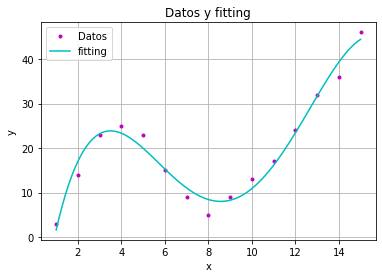

In [3]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def func(x, a0, a1, a2 ,a3, a4):
    return a4*x**4 + a3*x**3 + a2*x**2 + a1*x + a0

popt, pcov = curve_fit(func, df.x, df.y)
print('a0= ',popt[0])
print('a1= ',popt[1])
print('a2= ',popt[2])
print('a3= ',popt[3])
print('a4= ',popt[4])


x=np.linspace(np.min(df.x),np.max(df.x),100)
yfit=popt[4]*x**4 + popt[3]*x**3 + popt[2]*x**2 + popt[1]*x + popt[0]


plt.plot(df.x, df.y, '.m', label='Datos')
plt.plot(x, yfit,'-c', label='fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Datos y fitting')
plt.grid()

# standard errors S:
perr = np.sqrt(np.diag(pcov))

# R-squared
residuals = df.y- func(df.x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((df.y-np.mean(df.y))**2)
R_squared = 1 - (ss_res / ss_tot)

# Mean squared error
MSE=np.sum(residuals**2)/len(x)

print('Linear regression details:')
print(f'a0 = {popt[0]:.2f} +/- {perr[0]:.2f}')
print(f'a1 = {popt[1]:.2f}  +/- {perr[1]:.2f}')
print(f'a2 = {popt[2]:.2f}  +/- {perr[2]:.2f}')
print(f'a3 = {popt[3]:.2f}  +/- {perr[3]:.2f}')
print(f'a4 = {popt[4]:.2f}  +/- {perr[4]:.2f}')

print(f'R_squared = {R_squared:.2f}')
print(f'MSE = {MSE:.2f}')